---
## Эксперименты на синтетическом сгенерированном наборе
---
Создадим несколько кластеров из случайных значений вокруг заданной точки

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

rng = np.random.default_rng(318)

In [4]:
def make_cluster(x, y, radius, size: int, num_cluster: int = 0) -> pd.core.frame.DataFrame:
    """
    создать кластер из size точек с центром x,y, радиусом radius и номером num_cluster
    :return:
    """
    fi = np.random.random_sample(size=size)
    r = np.random.random_sample(size=size)
    data = pd.DataFrame(np.array([np.cos(2 * np.pi * fi) * radius * r + x,
                                  np.sin(2 * np.pi * fi) * radius * r + y]).T,
                        columns=['x', 'y'])
    data['target'] = num_cluster
    return data

[Text(0.5, 1.0, 'Сгенерированные кластеры')]

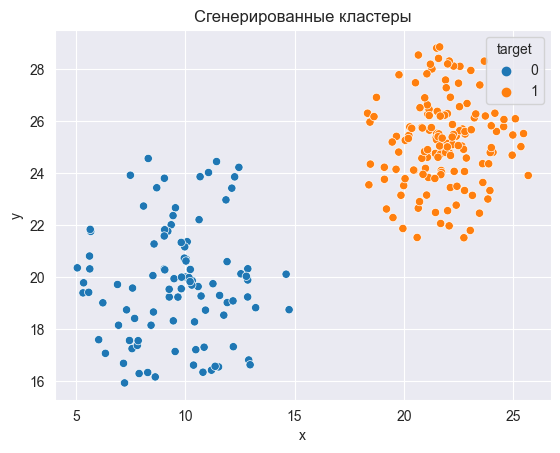

In [5]:
clasters_param = [{'x':10, 'y':20, 'radius':5, 'size':100, 'num_cluster':0},
                  {'x':22, 'y':25, 'radius':4, 'size':150, 'num_cluster':1}]
df = pd.DataFrame([],  columns=['x', 'y', 'target'])
for claster in clasters_param:
    df = pd.concat([df, make_cluster(**claster)], ignore_index=True)
sns.scatterplot(data=df, x='x', y='y', hue='target').set(title='Сгенерированные кластеры')

Вычислим центроиды для кластеров. Должны примерно совпадать с заданными x и у при создании

In [6]:
print(f"Заданные центры генерации кластеров:")
print([[claster['x'], claster['y']] for claster in clasters_param])
f_for_print = lambda claster: list(df[df['target'] == claster].drop(labels=['target'], axis=1).mean(axis=0).round(1))
print(f"Вычесленные центроиды кластеров:")
print([f_for_print(claster['num_cluster']) for claster in clasters_param])

Заданные центры генерации кластеров:
[[10, 20], [22, 25]]
Вычесленные центроиды кластеров:
[[9.6, 19.8], [21.8, 25.2]]
